# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

out_put_data_file ="output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | broome
Processing Record 3 of Set 1 | stephenville
Processing Record 4 of Set 1 | minas de marcona
Processing Record 5 of Set 1 | cabo san lucas
Processing Record 6 of Set 1 | maracas
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | twon-brass
Processing Record 10 of Set 1 | fada
Processing Record 11 of Set 1 | bo phloi
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | belyy yar
Processing Record 14 of Set 1 | hammerfest
Processing Record 15 of Set 1 | nova sintra
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | mbaiki
Processing Record 20 of Set 1 | san patricio
Processing Record 21 of Set 1 | blackmans bay
Processing Record 22 of Set 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [6]:
# Display sample data
city_data_df["Max Temp"] = city_data_df["Max Temp"] - 273.15
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,18.22,77,20,7.72,PT,1706980777
1,broome,42.2506,-75.8330,1.41,78,40,4.12,US,1706980778
2,stephenville,32.2207,-98.2023,15.69,58,0,3.13,US,1706980568
3,minas de marcona,-15.2119,-75.1103,23.39,62,70,4.40,PE,1706980778
4,cabo san lucas,22.8909,-109.9124,23.12,55,0,8.75,MX,1706980669


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,18.22,77,20,7.72,PT,1706980777
1,broome,42.2506,-75.8330,1.41,78,40,4.12,US,1706980778
2,stephenville,32.2207,-98.2023,15.69,58,0,3.13,US,1706980568
3,minas de marcona,-15.2119,-75.1103,23.39,62,70,4.40,PE,1706980778
4,cabo san lucas,22.8909,-109.9124,23.12,55,0,8.75,MX,1706980669


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

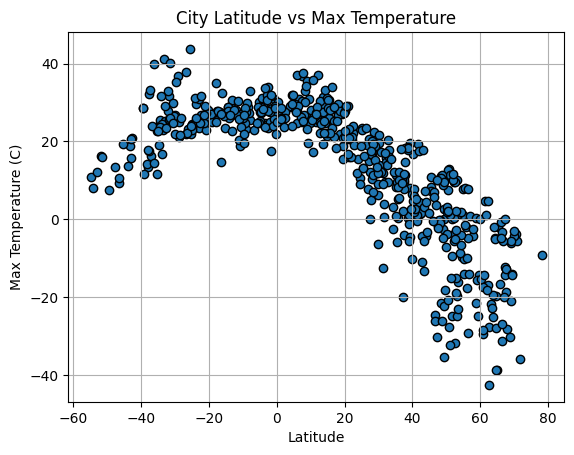

In [39]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

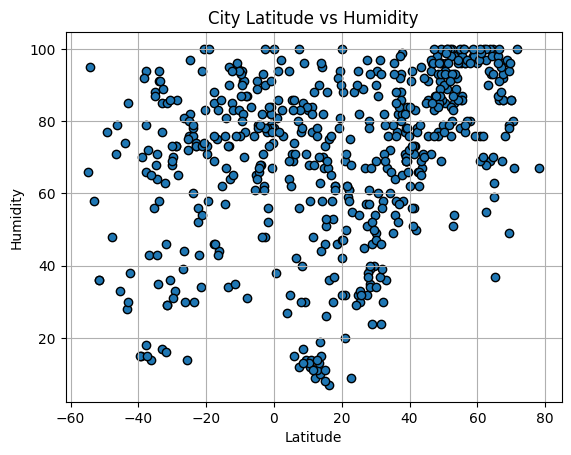

In [40]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

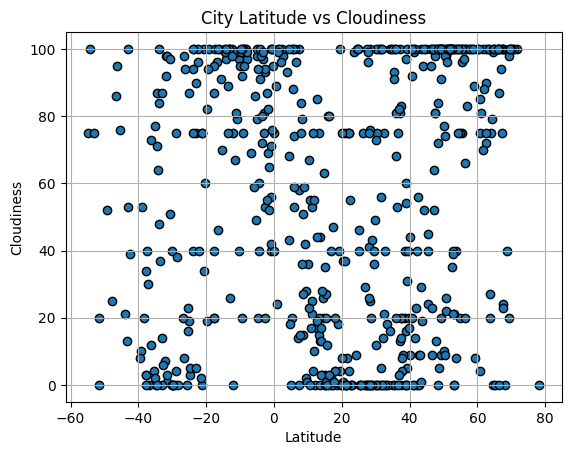

In [41]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

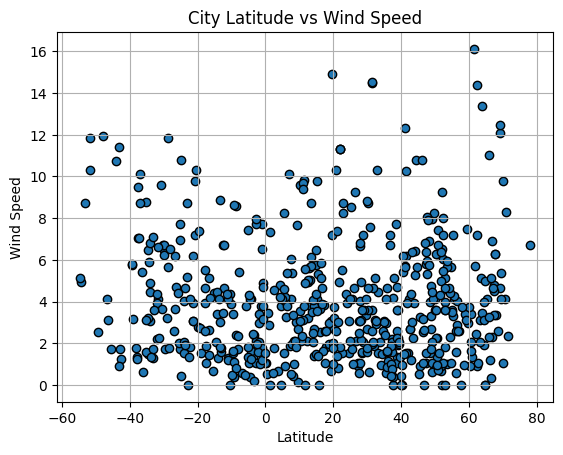

In [42]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
x_values = []
y_values = []
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

ValueError: Inputs must not be empty.

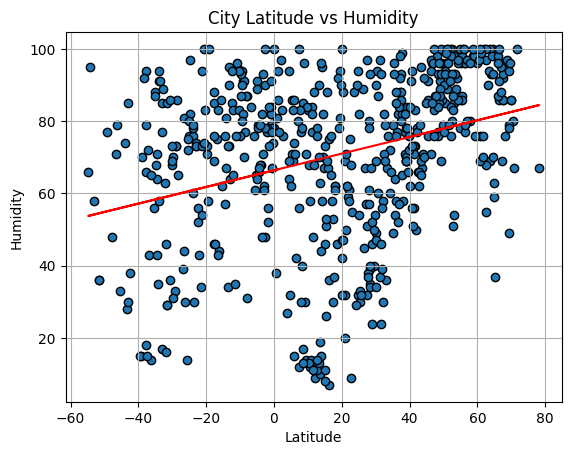

In [26]:
# Define a function to create Linear Regression plots
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

slope, intercept, r_value, p_value, std_err = linregress(city_data_df ['Lat'], city_data_df['Humidity'])
line_regress = slope * city_data_df['Lat'] + intercept
plt.plot(city_data_df['Lat'], line_regress, color='red')



# Show plot
plt.show()

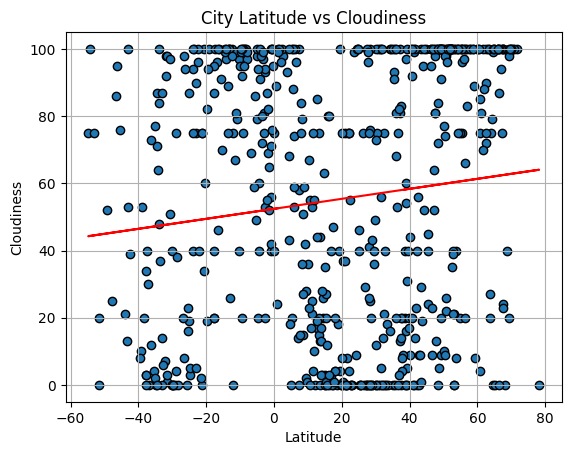

In [27]:
# Define a function to create Linear Regression plots
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

slope, intercept, r_value, p_value, std_err = linregress(city_data_df ['Lat'], city_data_df['Cloudiness'])
line_regress = slope * city_data_df['Lat'] + intercept
plt.plot(city_data_df['Lat'], line_regress, color='red')

# Show plot
plt.show()

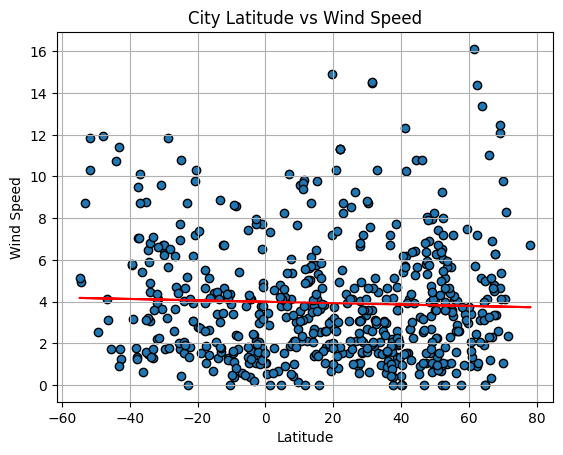

In [28]:
# Define a function to create Linear Regression plots
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

slope, intercept, r_value, p_value, std_err = linregress(city_data_df ['Lat'], city_data_df['Wind Speed'])
line_regress = slope * city_data_df['Lat'] + intercept
plt.plot(city_data_df['Lat'], line_regress, color='red')

# Show plot
plt.show()

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,18.22,77,20,7.72,PT,1706980777
1,broome,42.2506,-75.8330,1.41,78,40,4.12,US,1706980778
2,stephenville,32.2207,-98.2023,15.69,58,0,3.13,US,1706980568
4,cabo san lucas,22.8909,-109.9124,23.12,55,0,8.75,MX,1706980669
7,bethel,41.3712,-73.4140,4.45,56,0,6.17,US,1706980779


In [72]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,minas de marcona,-15.2119,-75.1103,23.39,62,70,4.40,PE,1706980778
5,maracas,-13.4411,-40.4308,28.74,34,89,3.02,BR,1706980778
6,adamstown,-25.0660,-130.1015,24.54,76,87,1.72,PN,1706980714
11,grytviken,-54.2811,-36.5092,8.06,95,100,4.95,GS,1706980779
15,waitangi,-43.9535,-176.5597,13.79,74,21,10.72,NZ,1706980714


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8482739930649843


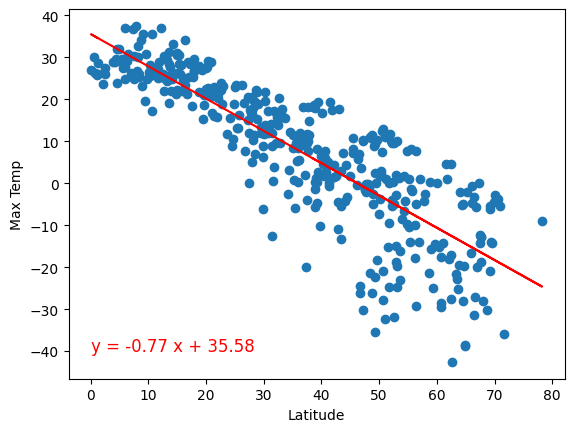

In [81]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
line_regress = slope * northern_hemi_df['Lat'] + intercept
plt.plot(northern_hemi_df['Lat'], line_regress, color='red')

print(f"The r-value is: {abs(r_value)}")
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.annotate(line_eq, (0,-40), fontsize=12, color='red')
plt.show()


The r-value is: 0.44430165377249053


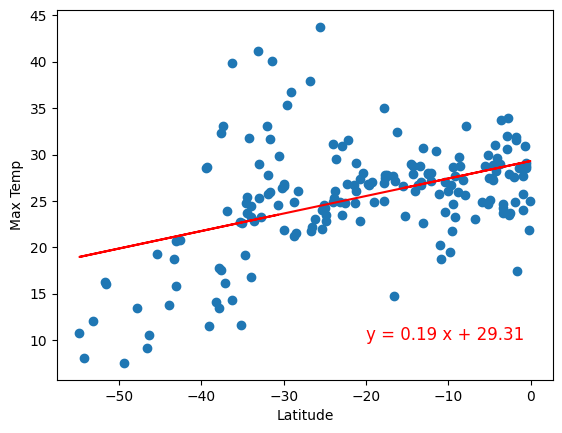

In [82]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
line_regress = slope * southern_hemi_df['Lat'] + intercept
plt.plot(southern_hemi_df['Lat'], line_regress, color='red')

print(f"The r-value is: {abs(r_value)}")
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.annotate(line_eq, (-20,10), fontsize=12, color='red')
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

It does appear that there is strong correlation between latitude and max tempterature in the northern hemisphere. It does appear to be a pretty strong correlation. As we get farther away from 0 or the equator the max temperature seems to get lower. However, we do not see that same strength of correlation or as profound of correlation. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.49397191909594235


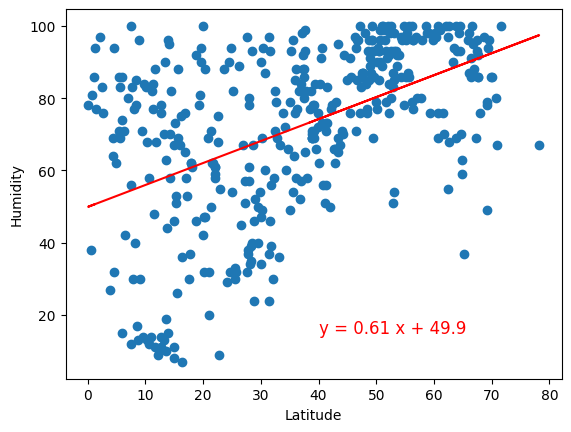

In [85]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

plt.xlabel("Latitude")
plt.ylabel("Humidity")

slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
line_regress = slope * northern_hemi_df['Lat'] + intercept
plt.plot(northern_hemi_df['Lat'], line_regress, color='red')

print(f"The r-value is: {abs(r_value)}")
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.annotate(line_eq, (40,15), fontsize=12, color='red')
plt.show()


The r-value is: 0.34283330830889014


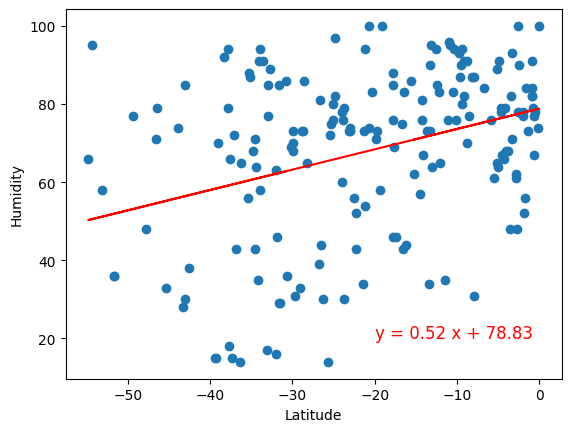

In [95]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

plt.xlabel("Latitude")
plt.ylabel("Humidity")

slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
line_regress = slope * southern_hemi_df['Lat'] + intercept
plt.plot(southern_hemi_df['Lat'], line_regress, color='red')

print(f"The r-value is: {abs(r_value)}")
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.annotate(line_eq, (-20,20), fontsize=12, color='red')
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

It appears that there is weak correlation between the data of humidity vs latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3330431632448387


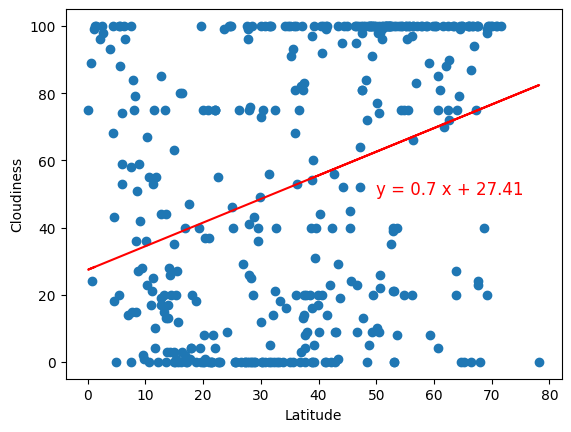

In [89]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
line_regress = slope * northern_hemi_df['Lat'] + intercept
plt.plot(northern_hemi_df['Lat'], line_regress, color='red')

print(f"The r-value is: {abs(r_value)}")
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.annotate(line_eq, (50,50), fontsize=12, color='red')
plt.show()

The r-value is: 0.4007399572396183


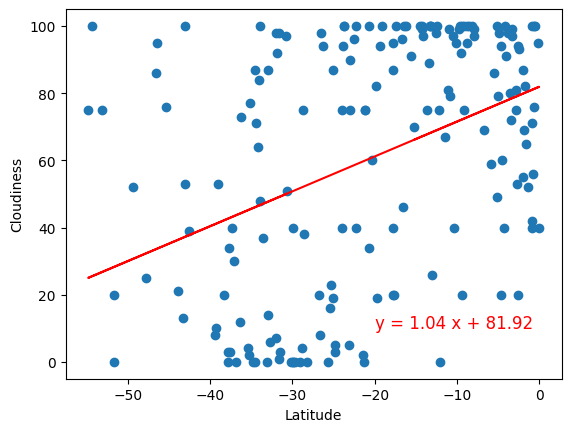

In [87]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
line_regress = slope * southern_hemi_df['Lat'] + intercept
plt.plot(southern_hemi_df['Lat'], line_regress, color='red')

print(f"The r-value is: {abs(r_value)}")
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.annotate(line_eq, (-20,10), fontsize=12, color='red')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

It appears that there is weak correlation between the data of humidity vs latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05464723199487285


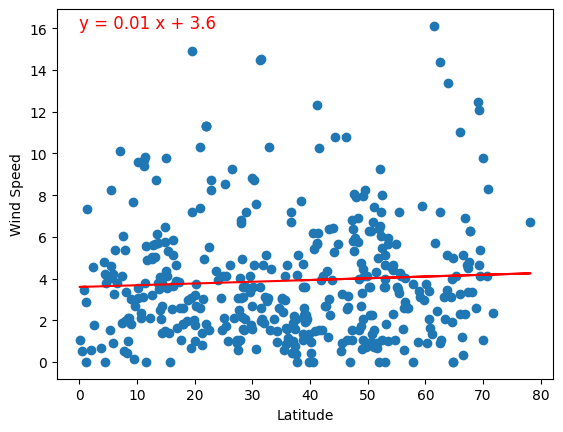

In [96]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
line_regress = slope * northern_hemi_df['Lat'] + intercept
plt.plot(northern_hemi_df['Lat'], line_regress, color='red')

print(f"The r-value is: {abs(r_value)}")
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.annotate(line_eq, (0,16), fontsize=12, color='red')
plt.show()

The r-value is: 0.3391060494151192


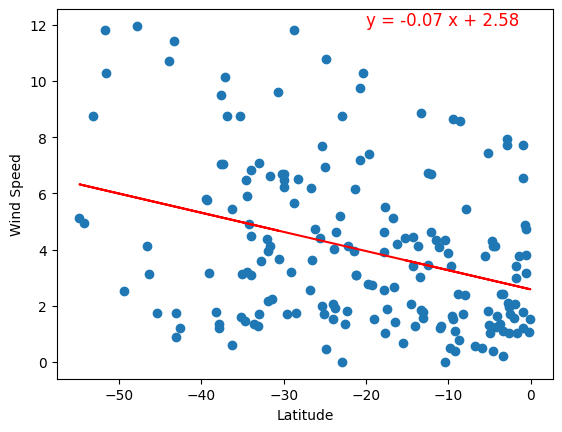

In [98]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
line_regress = slope * southern_hemi_df['Lat'] + intercept
plt.plot(southern_hemi_df['Lat'], line_regress, color='red')

print(f"The r-value is: {abs(r_value)}")
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.annotate(line_eq, (-20,12), fontsize=12, color='red')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

It appears that there is weak correlation between the data of humidity vs latitude.